In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualizationdf_e.shape
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load the dataset
df_n = pd.read_csv('../data/processed/cleaned_data_Namrata.csv')
df_e = pd.read_csv('../data/processed/cleaned_data_Emanuela.csv')



In [3]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Snippets')

from DataFrame_Analysis import analyze_dataframe

In [4]:
# Perform EDA now
#analyze_dataframe(df_e)

In [5]:
df_e.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type'],
      dtype='object')

In [6]:
# Correlation heatmap
numeric_cols = df_e.select_dtypes(include=[np.number]).columns#

df_e[numeric_cols].corr()['buy_price_by_area'].sort_values(ascending=False)

buy_price_by_area          1.000000
has_lift                   0.372199
n_bathrooms                0.239030
has_central_heating        0.227927
has_ac                     0.179578
sq_mt_built                0.174842
has_fitted_wardrobes       0.118977
has_parking                0.105790
is_exact_address_hidden    0.061469
is_new_development         0.047179
is_orientation_west        0.033421
n_rooms                    0.032660
is_orientation_east       -0.004768
is_orientation_north      -0.018520
is_orientation_south      -0.032438
is_renewal_needed         -0.036953
built_year                -0.084392
is_exterior               -0.084601
is_floor_under            -0.133991
rent_price                -0.152036
has_individual_heating    -0.227927
Name: buy_price_by_area, dtype: float64

<Axes: xlabel='buy_price_by_area', ylabel='Count'>

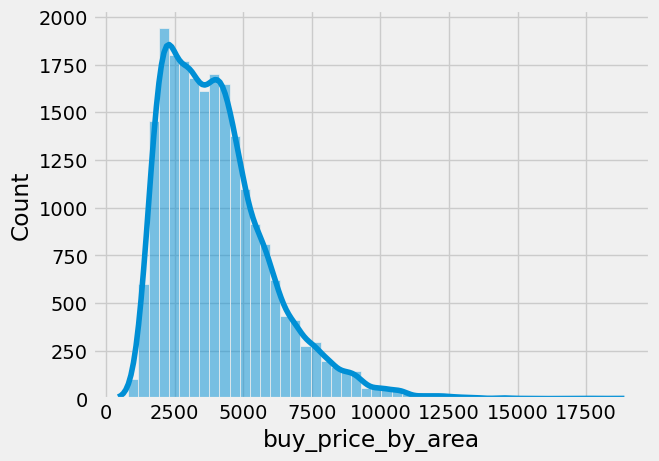

In [7]:
sns.histplot(df_e['buy_price_by_area'],kde = True,bins=50)

In [8]:
# This distribution is skewed - this can be improved to make it more normally distributed

<Axes: xlabel='buy_price_by_area', ylabel='Count'>

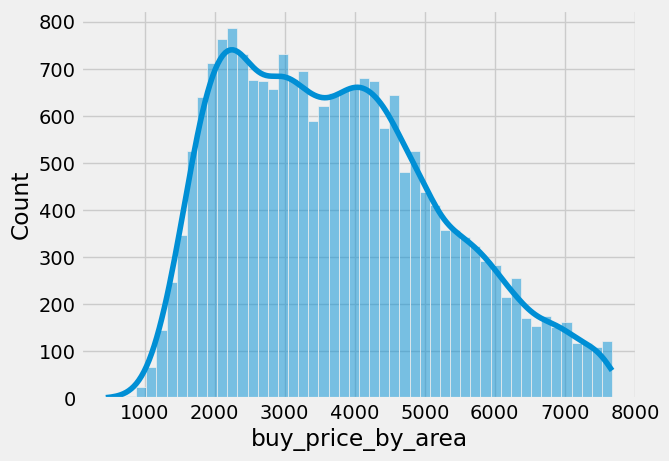

In [9]:
q = df_e['buy_price_by_area'].quantile(0.95)

df_e = df_e[df_e['buy_price_by_area']<q]

sns.histplot(df_e['buy_price_by_area'],kde = True,bins=50)

In [10]:
df_e.isna().sum()

sq_mt_built                  126
n_rooms                        0
n_bathrooms                   16
is_exact_address_hidden        0
floor                       2493
is_floor_under              1116
rent_price                     0
buy_price_by_area              0
is_renewal_needed              0
is_new_development           944
has_central_heating         7594
has_individual_heating      7594
has_ac                         0
has_fitted_wardrobes           0
has_lift                    2286
is_exterior                 2916
energy_certificate             0
has_parking                    0
is_orientation_north        9797
is_orientation_west         9797
is_orientation_south        9797
is_orientation_east         9797
built_year                 10959
neighbourhood                  0
district                       0
house_type                     0
dtype: int64

<Axes: ylabel='built_year'>

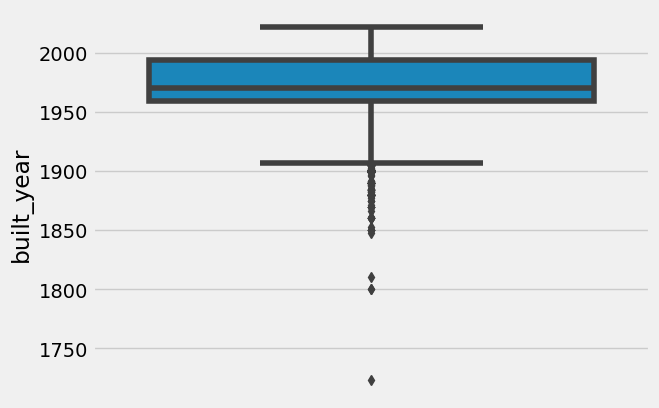

In [11]:
sns.boxplot(y = df_e['built_year'])

In [12]:
df_e.shape

(20441, 26)

In [13]:
# impute built year with mean
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='mean')
#df_e['built_year'] = imputer.fit_transform(df_e[['built_year']])


In [14]:
df_e = df_e[df_e['built_year']>1850]

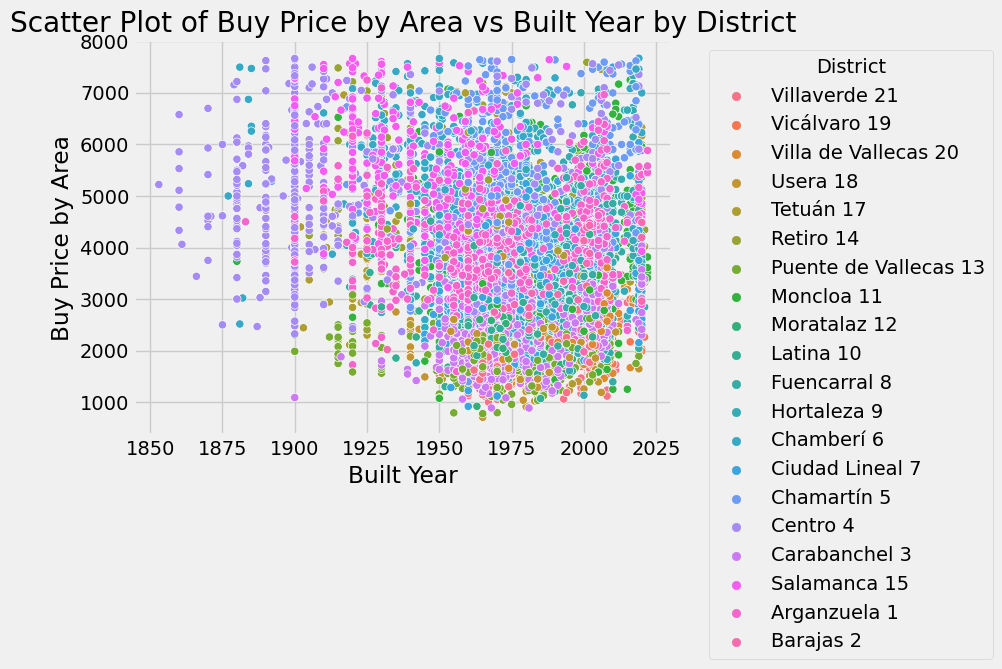

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e, x='built_year', y='buy_price_by_area', hue='district')

# Add labels and title
plt.xlabel('Built Year')
plt.ylabel('Buy Price by Area')
plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [16]:
# One can see some clustering here
# 1. There are areas in a city which are very old 
# 2. Areas with new houses

In [17]:
df_e.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type'],
      dtype='object')

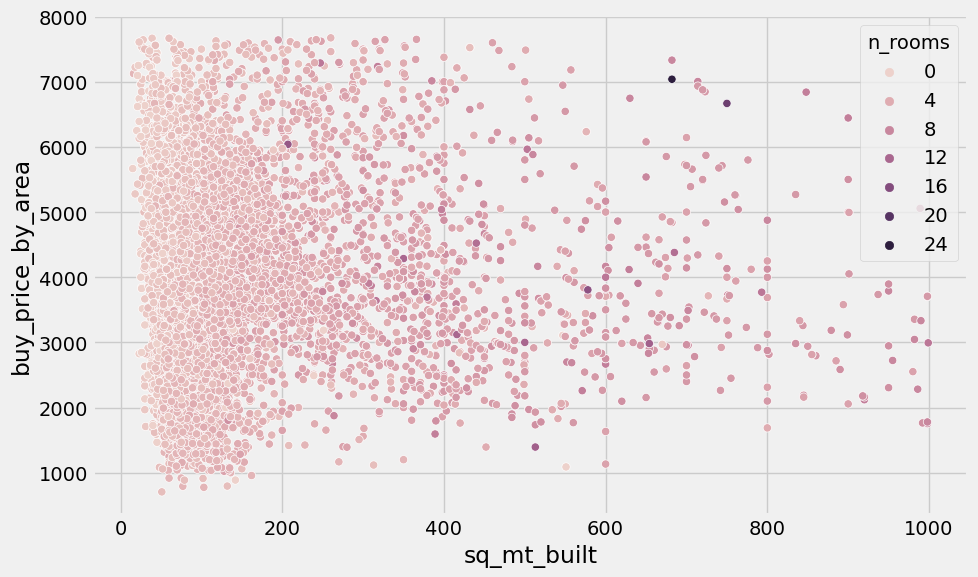

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e, x='sq_mt_built', y='buy_price_by_area', hue = 'n_rooms')

# Add labels and title
#plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
#plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

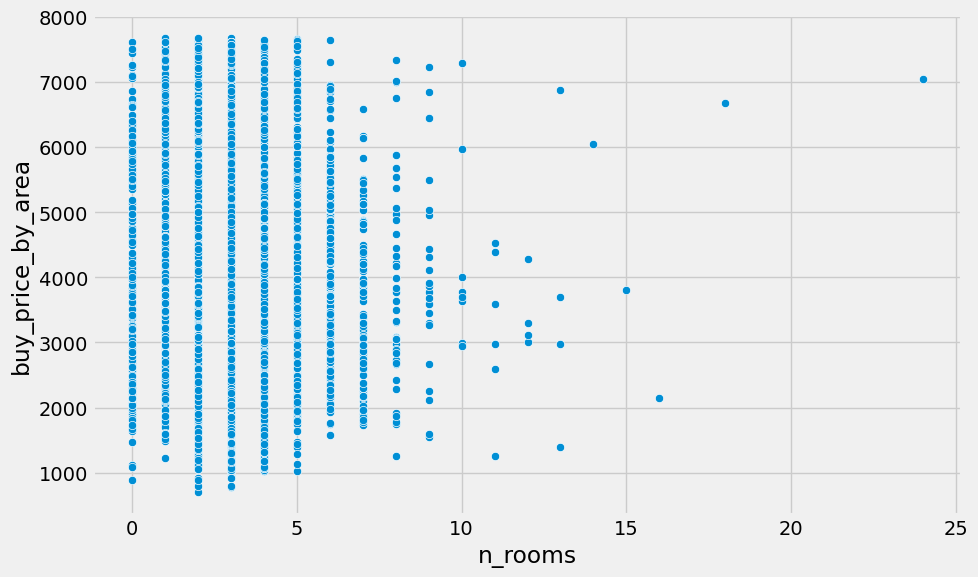

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e, x='n_rooms', y='buy_price_by_area')

# Add labels and title
#plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
#plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

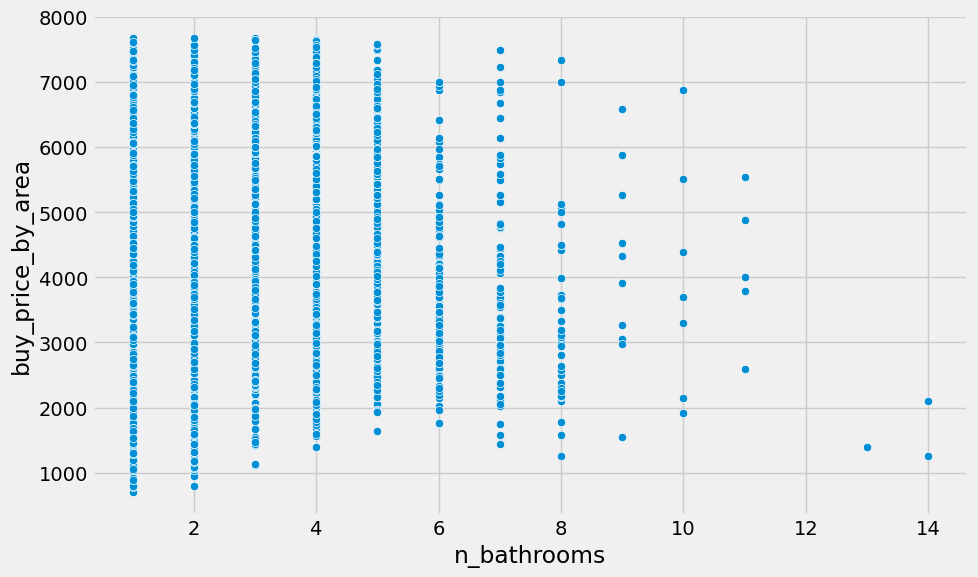

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e, x='n_bathrooms', y='buy_price_by_area')

# Add labels and title
#plt.title('Scatter Plot of Buy Price by Area vs Built Year by District')

# Move legend outside
#plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [21]:
# Divide data into train and test sets
train_data, test_data = train_test_split(df_e, test_size=0.2, random_state=9)

# Display the shapes of the train and test sets
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (7576, 26)
Test Data Shape: (1894, 26)


In [22]:
df_e.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type'],
      dtype='object')

In [23]:
#conda install -c conda-forge pycaret

In [24]:
from pycaret.regression import *

In [25]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=train_data,
    target = 'buy_price_by_area',
    session_id=9,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore'
    )

,Description,Value
0,Session id,9
1,Target,buy_price_by_area
2,Target type,Regression
3,Original data shape,"(7576, 26)"
4,Transformed data shape,"(7576, 69)"
5,Transformed train set shape,"(5303, 69)"
6,Transformed test set shape,"(2273, 69)"
7,Numeric features,20
8,Categorical features,5
9,Rows with missing values,51.0%


In [26]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,182.3117,102192.2394,318.4730,0.9535,0.0832,0.0500,0.3200
rf,Random Forest Regressor,211.6696,154318.0430,391.8078,0.9298,0.0958,0.0542,0.4430
gbr,Gradient Boosting Regressor,367.2436,267607.0657,516.9227,0.8780,0.1427,0.1070,0.1890
et,Extra Trees Regressor,362.6899,310496.6367,556.3537,0.8585,0.1414,0.0989,0.4280
dt,Decision Tree Regressor,312.3070,335125.9199,577.4870,0.8474,0.1361,0.0795,0.0720
br,Bayesian Ridge,583.6748,595624.9254,771.5961,0.7288,0.2233,0.1760,0.0600
ridge,Ridge Regression,583.8793,595840.3772,771.7296,0.7287,0.2245,0.1763,0.0580
lasso,Lasso Regression,584.0590,596349.3626,772.0691,0.7285,0.2240,0.1763,0.0750
llar,Lasso Least Angle Regression,584.0547,596342.7329,772.0647,0.7285,0.2240,0.1763,0.0570
lr,Linear Regression,584.2245,596857.6970,772.3796,0.7282,0.2245,0.1762,0.2830


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [27]:
predictions = predict_model(best_model, data=test_data)



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,180.4117,104310.1656,322.9708,0.9522,0.0862,0.0498


In [28]:
predictions[['buy_price_by_area','prediction_label']].head()

,buy_price_by_area,prediction_label
18573,5636,5579.587235
15034,5742,4729.125185
13833,2497,2921.792062
20507,4340,4283.204593
8535,4400,4285.274156


In [29]:
# Print the predictions
print(predictions[['buy_price_by_area', 'prediction_label']])

# Extract the actual and predicted values
actual_values = test_data['buy_price_by_area']
predicted_values = predictions['prediction_label']

# Calculate the R2 score
r2 = r2_score(actual_values, predicted_values)

print(f'R2 Score on Test Data: {r2}')

       buy_price_by_area  prediction_label
18573               5636       5579.587235
15034               5742       4729.125185
13833               2497       2921.792062
20507               4340       4283.204593
8535                4400       4285.274156
...                  ...               ...
7149                3132       3154.022464
2396                2182       2189.245972
2068                2921       2857.674947
4948                1158       1299.797071
1728                2489       2488.544164

[1894 rows x 2 columns]
R2 Score on Test Data: 0.9521755812152918


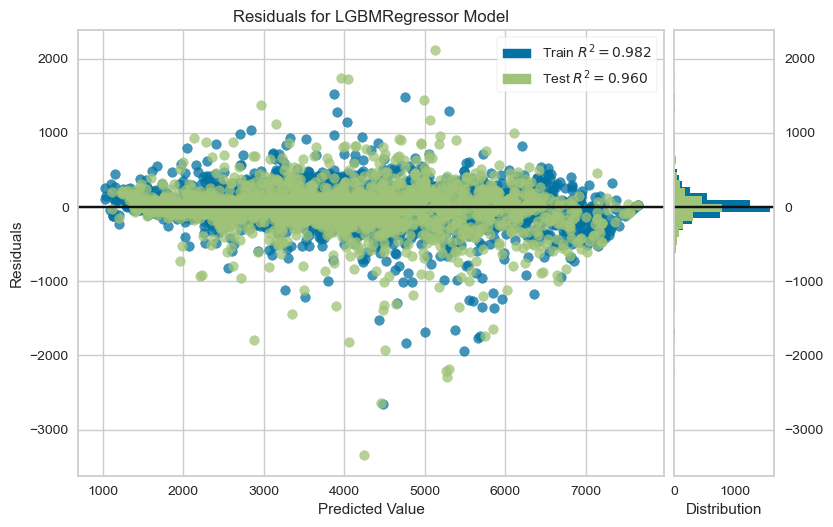

In [30]:
# plot residuals
plot_model(best_model, plot = 'residuals')

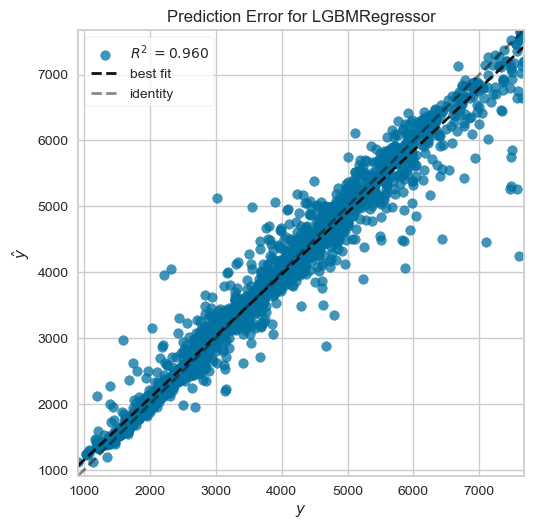

In [31]:
# plot error
plot_model(best_model, plot = 'error')

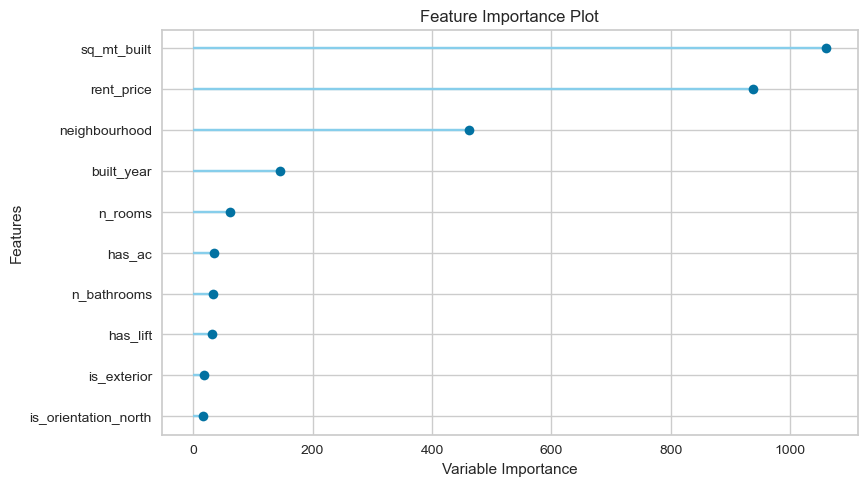

In [32]:
# plot feature importance
plot_model(best_model, plot = 'feature')